# Naive Bayes pada Dataset Cancer

## Setup & Import Library

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Praktikum Mandiri - Naive Bayes pada Dataset Cancer

# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

Pastikan file data.csv dari Kaggle sudah diupload ke Colab (menu: Files → Upload).

In [11]:
# Load dataset
data = pd.read_csv("/content/drive/MyDrive/praktikum_ml/praktikum09/data/data.csv")

# Tampilkan 5 baris pertama
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Preprocessing

In [12]:
# Hapus kolom yang tidak relevan
data = data.drop(['id', 'Unnamed: 32'], axis=1)

# Pisahkan fitur (X) dan label (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

## Split Data

In [13]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## Training Model Naive Bayes

In [14]:
# Inisialisasi model Gaussian Naive Bayes
model = GaussianNB()

# Training
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

## Evaluasi Model

In [15]:
# Akurasi
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9415204678362573

Confusion Matrix:
 [[104   4]
 [  6  57]]

Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.96      0.95       108
           M       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



## Visualisasi Confusion Matrix

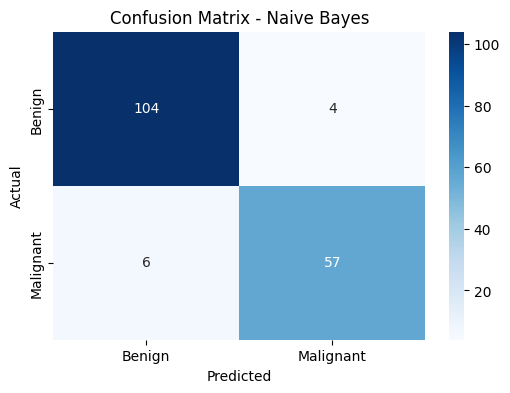

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign','Malignant'],
            yticklabels=['Benign','Malignant'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
# Import library untuk menyimpan model
import joblib

# Simpan model ke file
joblib.dump(model, "/content/drive/MyDrive/praktikum_ml/praktikum09/model/naive_bayes_model.pkl")

print("Model berhasil disimpan sebagai naive_bayes_model.pkl")

Model berhasil disimpan sebagai naive_bayes_model.pkl
